In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
from dash import jupyter_dash, Dash, html, dash_table, dcc, callback, Output, Input
import dash_daq as daq
import re

In [2]:
df_ocorrencia = pd.read_csv("./datasets/ocorrencia.csv", encoding="latin", delimiter=";")

In [3]:
df_ocorrencia.head()

,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,codigo_ocorrencia4,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,...,ocorrencia_dia,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista
0,87125,87125,87125,87125,87125,INCIDENTE,-7.219166666666,-39.26944444444,JUAZEIRO DO NORTE,CE,...,11/05/2025,04:20:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
1,87124,87124,87124,87124,87124,INCIDENTE,-18.88361111111,-48.22527777777,UBERLÂNDIA,MG,...,08/05/2025,14:00:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
2,87123,87123,87123,87123,87123,INCIDENTE,-23.43555555555,-46.47305555555,GUARULHOS,SP,...,09/05/2025,18:45:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
3,87122,87122,87122,87122,87122,INCIDENTE,-29.71083333333,-53.69222222222,SANTA MARIA,RS,...,04/05/2025,14:45:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
4,87121,87121,87121,87121,87121,INCIDENTE,-20.81722222222,-49.40694444444,SÃO JOSÉ DO RIO PRETO,SP,...,10/05/2025,10:00:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO


In [4]:
df_ocorrencia.tail()

,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,codigo_ocorrencia4,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,...,ocorrencia_dia,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista
13180,28377,28377,28377,28377,28377,ACIDENTE,***,***,IMPERATRIZ,MA,...,27/01/2007,11:18:00,SIM,FINALIZADA,A-053/CENIPA/2009,SIM,2009-11-16,2,1,NÃO
13181,28375,28375,28375,28375,28375,ACIDENTE,-23.6122222222,-51.385,APUCARANA,PR,...,26/01/2007,18:15:00,SIM,FINALIZADA,A-021/CENIPA/2010,SIM,2007-08-15,1,1,NÃO
13182,28355,28355,28355,28355,28355,ACIDENTE,-17.2541666667,-43.8536111111,BOCAIÚVA,MG,...,18/01/2007,09:10:00,SIM,FINALIZADA,A-001/CENIPA/2010,SIM,2010-03-19,11,1,NÃO
13183,28335,28335,28335,28335,28335,ACIDENTE,-23.3444444444,-51.0633333333,LONDRINA,PR,...,19/01/2007,12:30:00,SIM,FINALIZADA,A-169/CENIPA/2013,SIM,2013-12-16,1,1,NÃO
13184,28256,28256,28256,28256,28256,ACIDENTE,-22.2180555556,-47.1763888889,MOGI GUAÇU,SP,...,07/01/2007,11:30:00,SIM,FINALIZADA,A-112/CENIPA/2012,SIM,2012-10-17,2,1,NÃO


In [5]:
df_ocorrencia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13185 entries, 0 to 13184
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   codigo_ocorrencia               13185 non-null  int64 
 1   codigo_ocorrencia1              13185 non-null  int64 
 2   codigo_ocorrencia2              13185 non-null  int64 
 3   codigo_ocorrencia3              13185 non-null  int64 
 4   codigo_ocorrencia4              13185 non-null  int64 
 5   ocorrencia_classificacao        13185 non-null  object
 6   ocorrencia_latitude             10425 non-null  object
 7   ocorrencia_longitude            10425 non-null  object
 8   ocorrencia_cidade               13185 non-null  object
 9   ocorrencia_uf                   13185 non-null  object
 10  ocorrencia_pais                 13185 non-null  object
 11  ocorrencia_aerodromo            13185 non-null  object
 12  ocorrencia_dia                  13185 non-null

In [6]:
df_ocorrencia.columns[1: 5]

Index(['codigo_ocorrencia1', 'codigo_ocorrencia2', 'codigo_ocorrencia3',
       'codigo_ocorrencia4'],
      dtype='object')

In [7]:
for col in df_ocorrencia.columns[1: 5]:
    print(df_ocorrencia["codigo_ocorrencia"].eq(df_ocorrencia[col]).all())

True
True
True
True


In [8]:
df_ocorrencia = df_ocorrencia.drop(columns=df_ocorrencia.columns[1: 5])

In [9]:
df_ocorrencia["ocorrencia_classificacao"].value_counts()

ocorrencia_classificacao
INCIDENTE          9184
ACIDENTE           2843
INCIDENTE GRAVE    1158
Name: count, dtype: int64

In [10]:
df_ocorrencia["ocorrencia_latitude"]

0        -7.219166666666
1        -18.88361111111
2        -23.43555555555
3        -29.71083333333
4        -20.81722222222
              ...       
13180                ***
13181     -23.6122222222
13182     -17.2541666667
13183     -23.3444444444
13184     -22.2180555556
Name: ocorrencia_latitude, Length: 13185, dtype: object

In [11]:
def coordenadas_fora_do_padrao(col):
    menos = re.escape("-")
    ponto = re.escape(".")
    padrao = rf"^{menos}?[0-9]+{ponto}?[0-9]*$"
    numeros = df_ocorrencia[col]
    valores_padronizados = numeros.str.contains(padrao, na=True)
    return df_ocorrencia.loc[~valores_padronizados, col].unique()

In [12]:
coordenadas_fora_do_padrao("ocorrencia_latitude")

array(['***', '-14,92416', '-22,95941', '- 2.728333', '-12,29333',
       '-39,03333', '-23,44277373', '-22,89815', '-13,48805', '-12,12500',
       '-12,10000', '-15,8711', '-22,408', '-21,40916', '-22,9875',
       '-1,3708', '-23,446112', '-1,3808', '-7,1311', '-23.005278°',
       '-199.038.888.88', '-115.566.666.66', '-158.694.444.44',
       '-199.080.555.55', '-199.091.666.66', '-207.241.666.66',
       '-198.519.444.44', '-174.002.777.77', '-215.286.111.11',
       '-186.516.666.66', '-158.711.111.11', '-232.291.666.66',
       '-211.363.888.88', '-196.244.444.44', '-13.744.444.444',
       '-201.819.444.44', '-234.522.222.22', '-210.863.888.88',
       '-58.683.333.333', '-227.233.333.33', '-66.930.555.556',
       '-232.288.888.88', '-15.5561111.11', '-95.172.222.222',
       '-15.233.333.333', '-213.266.666.66', '-14.133.333.333',
       '-186.769.444.44', '-206.383.333.33', '-209.258.333.33',
       '-211.330.555.55', '-125.980.555.55', '-235.066.666.66',
       '-232.244.4

In [13]:
coordenadas_fora_do_padrao("ocorrencia_longitude")

array(['***', '-41,95666', '-52,96531', '- 60.812778', '-40,57166',
       '-14,85100', '-46,47348485', '-46,55613', '-38,80138', '-45,77111',
       '-45,89500', '-47,9186', '-53,2528', '-42,20083', '-43,37',
       '-48,3705', '-45,082439', '-48,4780', '-51,6530',
       '-459.763.888.88', '-455.419.444.44', '-479.194.444.44',
       '-439.852.777.77', '-439.891.666.66', '-458.638.888.88',
       '-439.505.555.55', '-510.863.888.88', '-485.377.777.77',
       '-486.677.777.77', '-479.186.111.11', '-458.613.888.88',
       '-477.766.666.66', '-432.505.555.55', '-439.719.444.44',
       '-484.616.666.66', '-467.866.666.66', '-442.263.888.88',
       '-467.022.222.22', '-480.497.222.22', '-366.519.444.44',
       '-458.711.111.11', '-485.833.333.33', '-357.836.111.11',
       '-525.816.666.66', '-467.302.777.77', '-484.613.888.88',
       '-528.102.777.77', '-459.980.555.55', '-513.838.888.88',
       '-466.344.444.44', '-477.758.333.33', '-466.338.888.88',
       '-447.202.777.77', '-4

In [14]:
#Problemas com as coordenadas: 
#1. Sequências de "*" ao invés de NaN
#2. "," ao invés de "."
#3. Espaços brancos
#4. "\\t"
#5. "°"
#6. Um caso com "*" mas com valor
#7. Múltiplos ".", corrompidos? Parecem ser 10 * coordenada
#8. 2 "-" no começo
#9. Valores maiores ou menores que o limite, também parecem ser 10 * coordenada

In [15]:
df = df_ocorrencia.copy()

In [16]:
lat_lim = (-34, 6)
lon_lim = (-74, -32)

def arrumar_coordenadas(x, lim):
    if isinstance(x, float):
        return x
    x = x.replace(",", ".").replace(" ", "").replace("\\t", "").replace("°", "").replace("***", "")
    y = x
    if x.count(".") > 1:
        index = x.find(".")
        x = x[:index+1] + x[index+1:].replace(".", "")
        t = list(x)
        t[index-1], t[index] = t[index], t[index-1]
        x = "".join(t)
    if x[0] == "-" and x[1] == "-":
        x = x[1:]
    return x

In [17]:
def df_com_coordendas_arrumadas(original, copia, col, regex, arrumar_coords, lim):
    copia[col] = original[col].replace(regex, np.nan, regex=True)
    copia[col] = copia[col].apply(lambda x: arrumar_coords(x, lim))
    copia[col] = pd.to_numeric(copia[col])

In [18]:
df_com_coordendas_arrumadas(df_ocorrencia, df, "ocorrencia_latitude", rf"^{re.escape("*")}+$", arrumar_coordenadas, lat_lim)
df_com_coordendas_arrumadas(df_ocorrencia, df, "ocorrencia_longitude", rf"^{re.escape("*")}+$", arrumar_coordenadas, lon_lim)

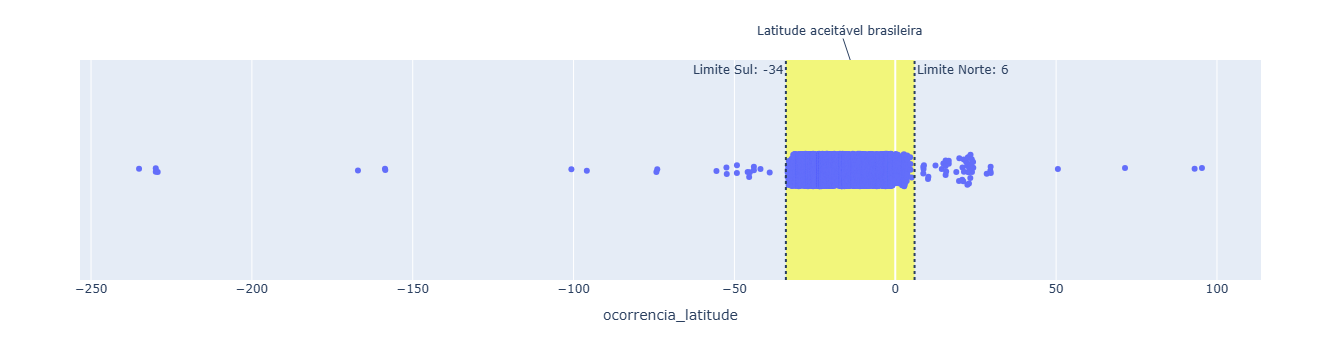

In [19]:
fig = px.strip(
    df,
    x="ocorrencia_latitude",
    hover_data=["ocorrencia_cidade", "ocorrencia_uf", "codigo_ocorrencia"]
)

fig.add_shape(
    type="rect",
    xref="x", x0=lat_lim[0], x1=lat_lim[1],
    yref="paper", y0=0, y1=1,
    fillcolor="yellow",
    opacity=0.5,
    line_width=0,
    layer="below"
)

fig.add_vline(
    x=lat_lim[0],
    line_dash="dot",
    annotation_text=f"Limite Sul: {lat_lim[0]}",
    annotation_position="top left"
)

fig.add_vline(
    x=lat_lim[1],
    line_dash="dot",
    annotation_text=f"Limite Norte: {lat_lim[1]}",
    annotation_position="top right"
)

fig.add_annotation(
    xref="x",
    x=(lat_lim[0] + lat_lim[1]) / 2,
    yref="paper",
    y=1,
    text="Latitude aceitável brasileira"
)

fig.show()

In [20]:
fig = px.strip(
    df,
    x="ocorrencia_longitude",
    hover_data=["ocorrencia_cidade", "ocorrencia_uf", "codigo_ocorrencia"]
)

fig.add_shape(
    type="rect",
    xref="x", x0=lon_lim[0], x1=lon_lim[1],
    yref="paper", y0=0, y1=1,
    fillcolor="yellow",
    opacity=0.5,
    line_width=0,
    layer="below"
)

fig.add_vline(
    x=lon_lim[0],
    line_dash="dot",
    annotation_text=f"Limite Sul: {lon_lim[0]}",
    annotation_position="top left"
)

fig.add_vline(
    x=lon_lim[1],
    line_dash="dot",
    annotation_text=f"Limite Norte: {lon_lim[1]}",
    annotation_position="top right"
)

fig.add_annotation(
    xref="x",
    x=(lon_lim[0] + lon_lim[1]) / 2,
    yref="paper",
    y=1,
    text="Longitude aceitável brasileira"
)

fig.show()

In [21]:
#Valores trocados, sem sinal negativo, multiplicados por 10, ...

In [22]:
coordenadas_problematicas = ((df["ocorrencia_latitude"] < lat_lim[0]) | \
                             (df["ocorrencia_latitude"] > lat_lim[1]) | \
                             (df["ocorrencia_longitude"] < lon_lim[0]) | \
                             (df["ocorrencia_longitude"] > lon_lim[1]))
coordenadas_problematicas.sum()

np.int64(134)

In [23]:
#Poucos dados com problema
df = df[~coordenadas_problematicas]

In [24]:
#Removendo coordenadas faltantes
df = df[df["ocorrencia_latitude"].notnull() & df["ocorrencia_longitude"].notnull()]

In [25]:
df["ocorrencia_cidade"].value_counts()

ocorrencia_cidade
GUARULHOS           577
RIO DE JANEIRO      534
SÃO PAULO           505
CAMPINAS            380
BRASÍLIA            275
                   ... 
SÃO JOSÉ DA LAPA      1
NOVO GAMA             1
VERANÓPOLIS           1
MATINHA               1
OLINDA                1
Name: count, Length: 1243, dtype: int64

In [26]:
df["ocorrencia_cidade"].str.contains(rf"^{re.escape("*")}+$", na=True).sum()

np.int64(0)

In [27]:
df["ocorrencia_uf"].value_counts()

ocorrencia_uf
SP     2288
RJ      706
MG      698
PR      609
RS      545
MT      472
GO      426
BA      411
PA      409
SC      345
PE      289
AM      283
DF      275
MS      234
CE      185
MA      131
ES      109
RR      106
TO       93
PI       82
RO       66
AC       59
AL       52
PB       52
RN       38
SE       28
AP       23
***      10
Name: count, dtype: int64

In [28]:
df["ocorrencia_uf"].str.contains(rf"^{re.escape("*")}+$", na=True).sum()

np.int64(10)

In [29]:
df = df[df["ocorrencia_uf"] != "***"]

In [30]:
df["ocorrencia_pais"].value_counts()

ocorrencia_pais
BRASIL    9014
Name: count, dtype: int64

In [31]:
df = df.drop(columns="ocorrencia_pais")

In [32]:
df["ocorrencia_aerodromo"].value_counts()

ocorrencia_aerodromo
FAER    2286
SBGR     491
SBKP     311
SBGL     303
SBSP     248
        ... 
SDMH       1
SJXD       1
SDWC       1
SSJI       1
SSAQ       1
Name: count, Length: 634, dtype: int64

In [33]:
df["ocorrencia_aerodromo"].str.contains(rf"^{re.escape("*")}+$", na=True).sum()

np.int64(0)

In [34]:
(df["ocorrencia_aerodromo"].str.len() != 4).sum()

np.int64(0)

In [35]:
df["ocorrencia_dia"].value_counts()

ocorrencia_dia
06/03/2024    22
16/02/2024    21
20/02/2024    20
01/03/2024    19
11/01/2024    19
              ..
30/04/2025     1
28/04/2025     1
06/01/2008     1
21/01/2008     1
01/11/2007     1
Name: count, Length: 3703, dtype: int64

In [36]:
df["ocorrencia_hora"].value_counts()

ocorrencia_hora
13:00:00    145
12:00:00    142
20:00:00    139
14:00:00    131
13:30:00    129
           ... 
15:38:00      1
07:37:00      1
13:51:00      1
17:28:00      1
06:55:00      1
Name: count, Length: 1169, dtype: int64

In [37]:
df["ocorrencia_tempo"] = pd.to_datetime(df["ocorrencia_dia"] + " " + df["ocorrencia_hora"], format="%d/%m/%Y %H:%M:%S")
df = df.drop(columns=["ocorrencia_dia", "ocorrencia_hora"])

In [38]:
df["investigacao_aeronave_liberada"].value_counts()

investigacao_aeronave_liberada
SIM    8983
NÃO      31
Name: count, dtype: int64

In [39]:
df["investigacao_aeronave_liberada"].isnull().sum()

np.int64(0)

In [40]:
df["investigacao_status"].value_counts()

investigacao_status
FINALIZADA    8597
ATIVA          416
Name: count, dtype: int64

In [41]:
df["investigacao_status"].isnull().sum()

np.int64(1)

In [42]:
df = df[df["investigacao_status"].notnull()]

In [43]:
df["divulgacao_relatorio_numero"].value_counts()

divulgacao_relatorio_numero
***                   6054
A DEFINIR               88
ENCERRADA NO RAI        29
**                       6
A-035/CENIPA/2013        3
                      ... 
IG-029/CENIPA/2025       1
A-022/CENIPA/2025        1
A-026/CENIPA/2025        1
A-025/CENIPA/2025        1
IG-015/CENIPA/2025       1
Name: count, Length: 2540, dtype: int64

In [44]:
df["divulgacao_relatorio_numero"].str.contains(rf"^{re.escape("*")}+$", na=True).sum()

np.int64(6289)

In [45]:
df["divulgacao_relatorio_numero"] = df["divulgacao_relatorio_numero"].replace(rf"^{re.escape("*")}+$", np.nan, regex=True)

In [46]:
df["divulgacao_relatorio_publicado"].value_counts()

divulgacao_relatorio_publicado
NÃO    6861
SIM    2152
Name: count, dtype: int64

In [47]:
df["divulgacao_relatorio_publicado"].isnull().sum()

np.int64(0)

In [48]:
df["divulgacao_dia_publicacao"].value_counts()

divulgacao_dia_publicacao
2017-08-01    62
2022-11-03    55
2021-07-08    48
2018-05-10    40
2019-04-08    35
              ..
2008-03-14     1
2009-09-29     1
2013-09-13     1
2008-07-02     1
2007-08-15     1
Name: count, Length: 333, dtype: int64

In [49]:
df["divulgacao_dia_publicacao"].str.contains(rf"^{re.escape("*")}+$", na=True).sum()

np.int64(6856)

In [50]:
df["divulgacao_dia_publicacao"].isnull().sum()

np.int64(6856)

In [51]:
df["divulgacao_dia_publicacao"] = pd.to_datetime(df["divulgacao_dia_publicacao"], format="%Y-%m-%d")

In [52]:
df["total_recomendacoes"].value_counts()

total_recomendacoes
0     7871
1      512
2      292
3      127
4       73
5       32
7       24
6       21
9       21
8       13
11       7
12       4
15       4
14       3
13       2
18       2
20       1
19       1
10       1
22       1
29       1
Name: count, dtype: int64

In [53]:
df["total_recomendacoes"].isnull().sum()

np.int64(0)

In [54]:
df["total_aeronaves_envolvidas"].value_counts()

total_aeronaves_envolvidas
1    8939
2      70
3       2
0       1
4       1
Name: count, dtype: int64

In [55]:
df["total_aeronaves_envolvidas"].isnull().sum()

np.int64(0)

In [56]:
df["ocorrencia_saida_pista"].value_counts()

ocorrencia_saida_pista
NÃO    8325
SIM     688
Name: count, dtype: int64

In [57]:
df["ocorrencia_saida_pista"].isnull().sum()

np.int64(0)

In [58]:
fig = px.scatter_map(
    df, 
    lat="ocorrencia_latitude",
    lon="ocorrencia_longitude",
    color="ocorrencia_classificacao",
    hover_data=["ocorrencia_cidade", "ocorrencia_uf"],
    width=1000,
    height=600
)
fig.show()

In [59]:
df_new = df.copy()

In [60]:
df_new["Ano"] = df_new["ocorrencia_tempo"].dt.year
data = df_new["Ano"].value_counts().sort_index()

fig = px.line(
    x=data.index,
    y=data.values,
    markers=True,
    labels={"x": "Ano", "y": "Quantidade de acidentes"},
    width=800,
    height=600
)
fig.show()

In [61]:
df_new["Mês"] = df_new["ocorrencia_tempo"].dt.month
data = df_new["Mês"].value_counts().sort_index()

fig = px.line(
    x=data.index,
    y=data.values,
    markers=True,
    labels={"x": "Mês", "y": "Quantidade de acidentes"},
    width=800,
    height=600
)
fig.show()

In [62]:
df_new["Dia"] = df_new["ocorrencia_tempo"].dt.day
data = df_new["Dia"].value_counts().sort_index()

fig = px.line(
    x=data.index,
    y=data.values,
    markers=True,
    labels={"x": "Dia", "y": "Quantidade de acidentes"},
    width=800,
    height=600
)
fig.show()

In [63]:
df_new["Hora"] = df_new["ocorrencia_tempo"].dt.hour
data = df_new["Hora"].value_counts().sort_index()

fig = px.line(
    x=data.index,
    y=data.values,
    markers=True,
    labels={"x": "Hora", "y": "Quantidade de acidentes"},
    width=800,
    height=600
)
fig.show()

In [64]:
data = df_new["ocorrencia_uf"].value_counts().sort_values(ascending=True)

fig = px.bar(
    x=data.values,
    y=data.index,
    labels={"x": "Quantidade de acidentes", "y": "Estados"},
    width=800,
    height=600
)
fig.show()

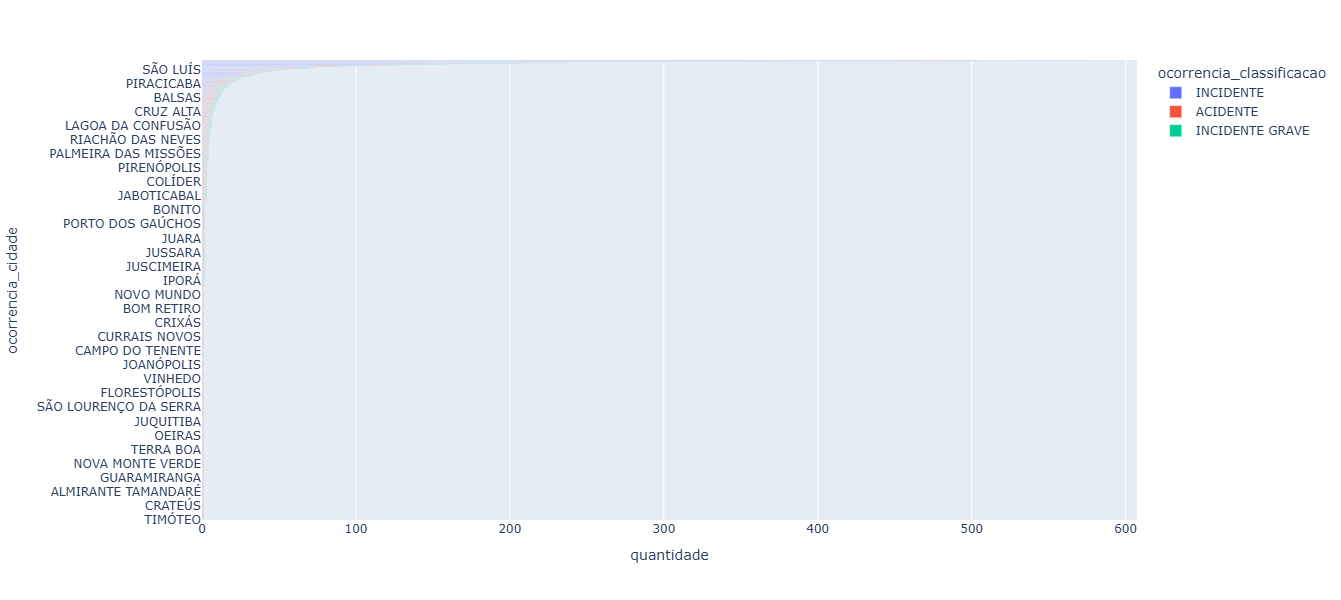

In [65]:
data = df_new.\
    groupby(["ocorrencia_cidade", "ocorrencia_classificacao"]).\
    agg("size").\
    reset_index().\
    rename(columns={0: "quantidade"}).\
    sort_values(by="quantidade")

order = df_new["ocorrencia_cidade"].value_counts().index

fig = px.bar(
    data,
    x="quantidade",
    y="ocorrencia_cidade",
    color="ocorrencia_classificacao",
    category_orders={"ocorrencia_cidade": order},
    width=800,
    height=600
)
fig.show()

In [66]:
jupyter_dash.default_mode="external"

app = Dash(__name__)

app.layout = html.Div([
    html.H1("Dashboard dos buxas"),
    html.H2("Ocorrências aéreas brasileiras"),
    html.Hr(),
    html.H3("Escolher unidade de tempo:"),
    dcc.RadioItems(options=["Ano", "Mês", "Dia", "Hora"], value="Ano", id="radio-type-shit"),
    html.H3("Escolher local:"),
    dcc.Dropdown(options=np.sort(df["ocorrencia_uf"].unique()), value=None, id="drop-type-shit"),
    html.Div([
        dcc.Graph(id="date-graph", style={'display': 'inline-block'}),
        dcc.Graph(id="geo-graph", style={'display': 'inline-block'}),
        dcc.Graph(id="bar-graph", style={'display': 'inline-block'})
    ]),
    html.H3("Orientação do gráfico:"),
    daq.ToggleSwitch(id="toggle-switch", value=True),
    html.Div([
        dcc.Graph(id="violin-graph", style={'display': 'inline-block'}),
        dcc.Graph(id="stack-graph", style={'display': 'inline-block'})
    ])
])

@callback(
    Output(component_id="date-graph", component_property="figure"),
    Input(component_id="radio-type-shit", component_property="value"),
    Input(component_id="drop-type-shit", component_property="value")
)
def date(col, loc):
    if loc == None:
        data = df_new[col].value_counts().sort_index()
    else:
        data = df_new[df_new["ocorrencia_uf"] == loc][col].value_counts().sort_index()
    fig = px.line(
        x=data.index,
        y=data.values,
        markers=True,
        labels={"x": col, "y": "Quantidade"},
        width=500,
        height=600,
        title="Ocorrências no tempo"
    )
    return fig

@callback(
    Output(component_id="geo-graph", component_property="figure"),
    Input(component_id="drop-type-shit", component_property="value")
)
def geo(loc):
    data = df if loc == None else df[df["ocorrencia_uf"] == loc]
    fig = px.scatter_map(
        data, 
        lat="ocorrencia_latitude",
        lon="ocorrencia_longitude",
        hover_data=["ocorrencia_cidade", "ocorrencia_uf"],
        width=500,
        height=600,
        title="Mapinha"
    )
    return fig

@callback(
    Output(component_id="bar-graph", component_property="figure"),
    Input(component_id="drop-type-shit", component_property="value")
)
def bar(loc):
    if loc == None:
        data = df["ocorrencia_uf"].value_counts().sort_values(ascending=True)
        ylabel = "Estados"
    else:
        data = df[df["ocorrencia_uf"] == loc]["ocorrencia_cidade"].value_counts().sort_values(ascending=True)
        ylabel = "Cidades"

    fig = px.bar(
        x=data.values,
        y=data.index,
        labels={"x": "Quantidade", "y": ylabel},
        width=500,
        height=600,
        title="Ocorrências por local"
    )
    return fig

@callback(
    Output(component_id="violin-graph", component_property="figure"),
    Input(component_id="drop-type-shit", component_property="value")
)
def violin(fodase):
    data = df
    fig = px.violin(
        data,
        y="total_recomendacoes",
        color="ocorrencia_classificacao",
        labels={"ocorrencia_classificacao": "Classificação da ocorrência", "total_recomendacoes": "Recomendações por ocorrência"},
        width=750,
        height=600,
        title="Recomendações de segurança por gravidade da ocorrência"
    )
    
    return fig

@callback(
    Output(component_id="stack-graph", component_property="figure"),
    Input(component_id="toggle-switch", component_property="value")
)
def stack(orient):
    axis, x, color = ("index", "total_aeronaves_envolvidas", "ocorrencia_classificacao") if orient else \
    ("columns", "ocorrencia_classificacao", "total_aeronaves_envolvidas")
    data = pd.crosstab(df["ocorrencia_classificacao"], df["total_aeronaves_envolvidas"]).apply(lambda x: 100 * x / x.sum(), axis=axis).\
        reset_index().melt(id_vars="ocorrencia_classificacao", value_name="percent")

    fig = px.bar(
        data,
        x=x,
        y="percent",
        color=color,
        barmode="stack",
        labels={
            "total_aeronaves_envolvidas": "Quantidade de aeronaves envolvidas",
            "percent": "Proporção (%)",
            "ocorrencia_classificacao": "Tipo de ocorrência"
        },
        title="Proporção dos tipos de ocorrência conforme o número de aeronaves",
        width=750,
        height=600
    )
    return fig

app.run(debug=True)

Dash app running on http://127.0.0.1:8050/
